## Graded Assignment 2
Machine Learning - Supervised Learning

In [1]:
#1. Import the required libraries and read the dataset.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score  
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler  ## to Normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('TelcomCustomer-Churn.csv', encoding='unicode_escape')


In [3]:
#2. Check the first few samples, shape, info of the data

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [7]:
#3. Check the percentage of missing values in each column of the dataframe. Drop the missing values if there are any

In [8]:
#Overview of the data
def data_overiew(df, message):
    print(f'{message}:\n')
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values %:\n", df.isnull().sum()/len(df)*100)
    print("\nMissing values:", df.isnull().sum().values.sum())
    
data_overiew(df, 'Overview of the dataset')

Overview of the dataset:


Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values %:
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Missing values: 0


In [9]:
#4. Check if there are any duplicate records in the dataset? If any drop them

In [10]:
print("Number of Duplicated Records : ", len(df[df.duplicated()]))

Number of Duplicated Records :  0


In [11]:
#5. Drop the columns which you think redundant for the analysis

In [12]:
df = df.drop(columns=["customerID","gender","SeniorCitizen","OnlineSecurity","OnlineBackup","PaperlessBilling","PaymentMethod"], axis=1)
df.head()


,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Yes,No,1,No,No phone service,DSL,No,No,No,No,Month-to-month,29.85,29.85,No
1,No,No,34,Yes,No,DSL,Yes,No,No,No,One year,56.95,1889.5,No
2,No,No,2,Yes,No,DSL,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,No,No,45,No,No phone service,DSL,Yes,Yes,No,No,One year,42.30,1840.75,No
4,No,No,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [13]:
#6. Encode the categorical variables

In [14]:
df.dtypes

Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

df

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Yes,No,1,No,No phone service,DSL,No,No,No,No,Month-to-month,29.85,29.85,No
1,No,No,34,Yes,No,DSL,Yes,No,No,No,One year,56.95,1889.50,No
2,No,No,2,Yes,No,DSL,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,No,No,45,No,No phone service,DSL,Yes,Yes,No,No,One year,42.30,1840.75,No
4,No,No,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,24,Yes,Yes,DSL,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Yes,Yes,11,No,No phone service,DSL,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [16]:
df.dtypes

Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
def missing_values(df):
    print("Missing Values Percentages\n",df.isnull().sum()/len(df)*100)

missing_values(df)

Missing Values Percentages
 Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


In [18]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [19]:
def missing_values(df):
    print("Missing Values Percentages\n",df.isnull().sum()/len(df)*100)

missing_values(df)

Missing Values Percentages
 Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [20]:
objects_variable = [i for i in df[['Partner','Dependents','PhoneService','MultipleLines','InternetService','DeviceProtection',
                            'TechSupport','StreamingTV','StreamingMovies','Contract', 'Churn']] if df.dtypes[i] == object]
objects_variable

le = LabelEncoder()

def encoder(df):
    for i in objects_variable:
        df[i]= le.fit_transform(df[i].astype(str)).astype(int)

encoder(df)

df= pd.get_dummies(df, drop_first= True)
df.head(5)

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,0,0,29.85,29.85,0
1,0,0,34,1,0,0,2,0,0,0,1,56.95,1889.50,0
2,0,0,2,1,0,0,0,0,0,0,0,53.85,108.15,1
3,0,0,45,0,1,0,2,2,0,0,1,42.30,1840.75,0
4,0,0,2,1,0,1,0,0,0,0,0,70.70,151.65,1


In [21]:
#7. Perform a detailed univariate, bivariate, and multivariate analysis

In [22]:
categorical_features=df.select_dtypes(include=[np.int])
categorical_features.columns

Index(['Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'Churn'],
      dtype='object')

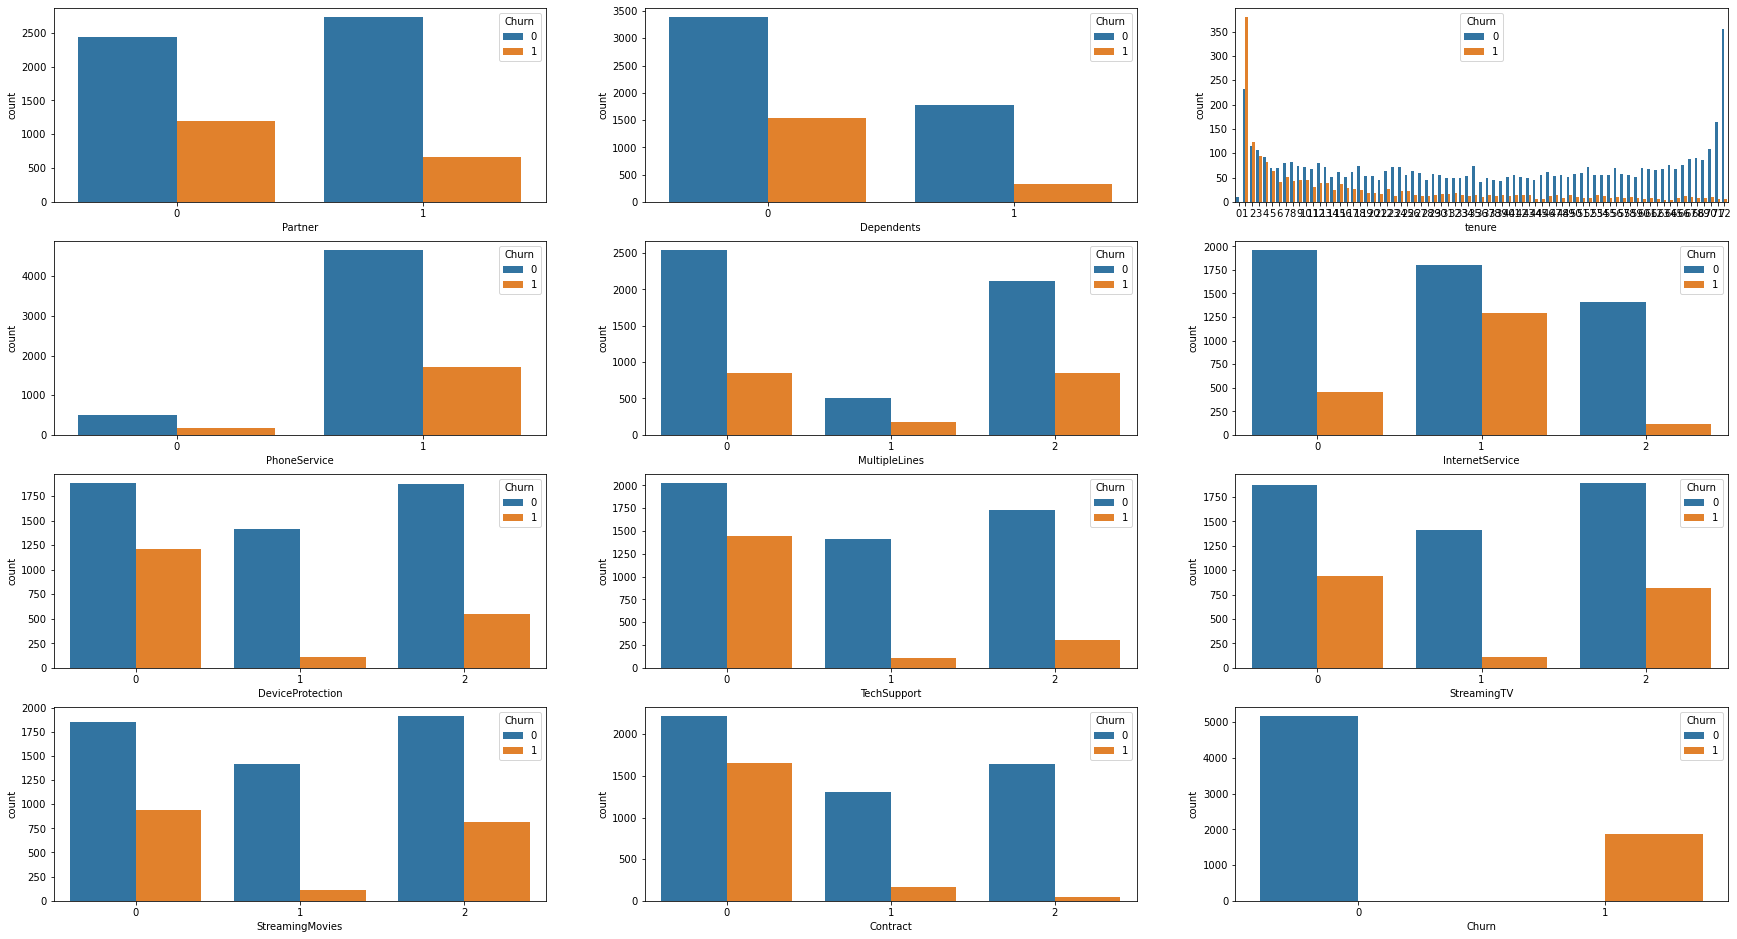

In [23]:
i=1
plt.figure(figsize=(30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='Churn',data=df)
    i+=1

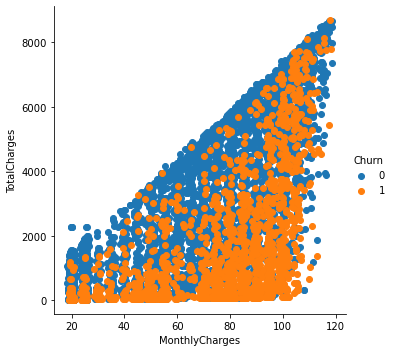

In [24]:
sns.FacetGrid(df,hue = 'Churn' , size = 5).map(plt.scatter,'MonthlyCharges','TotalCharges').add_legend();
plt.show()

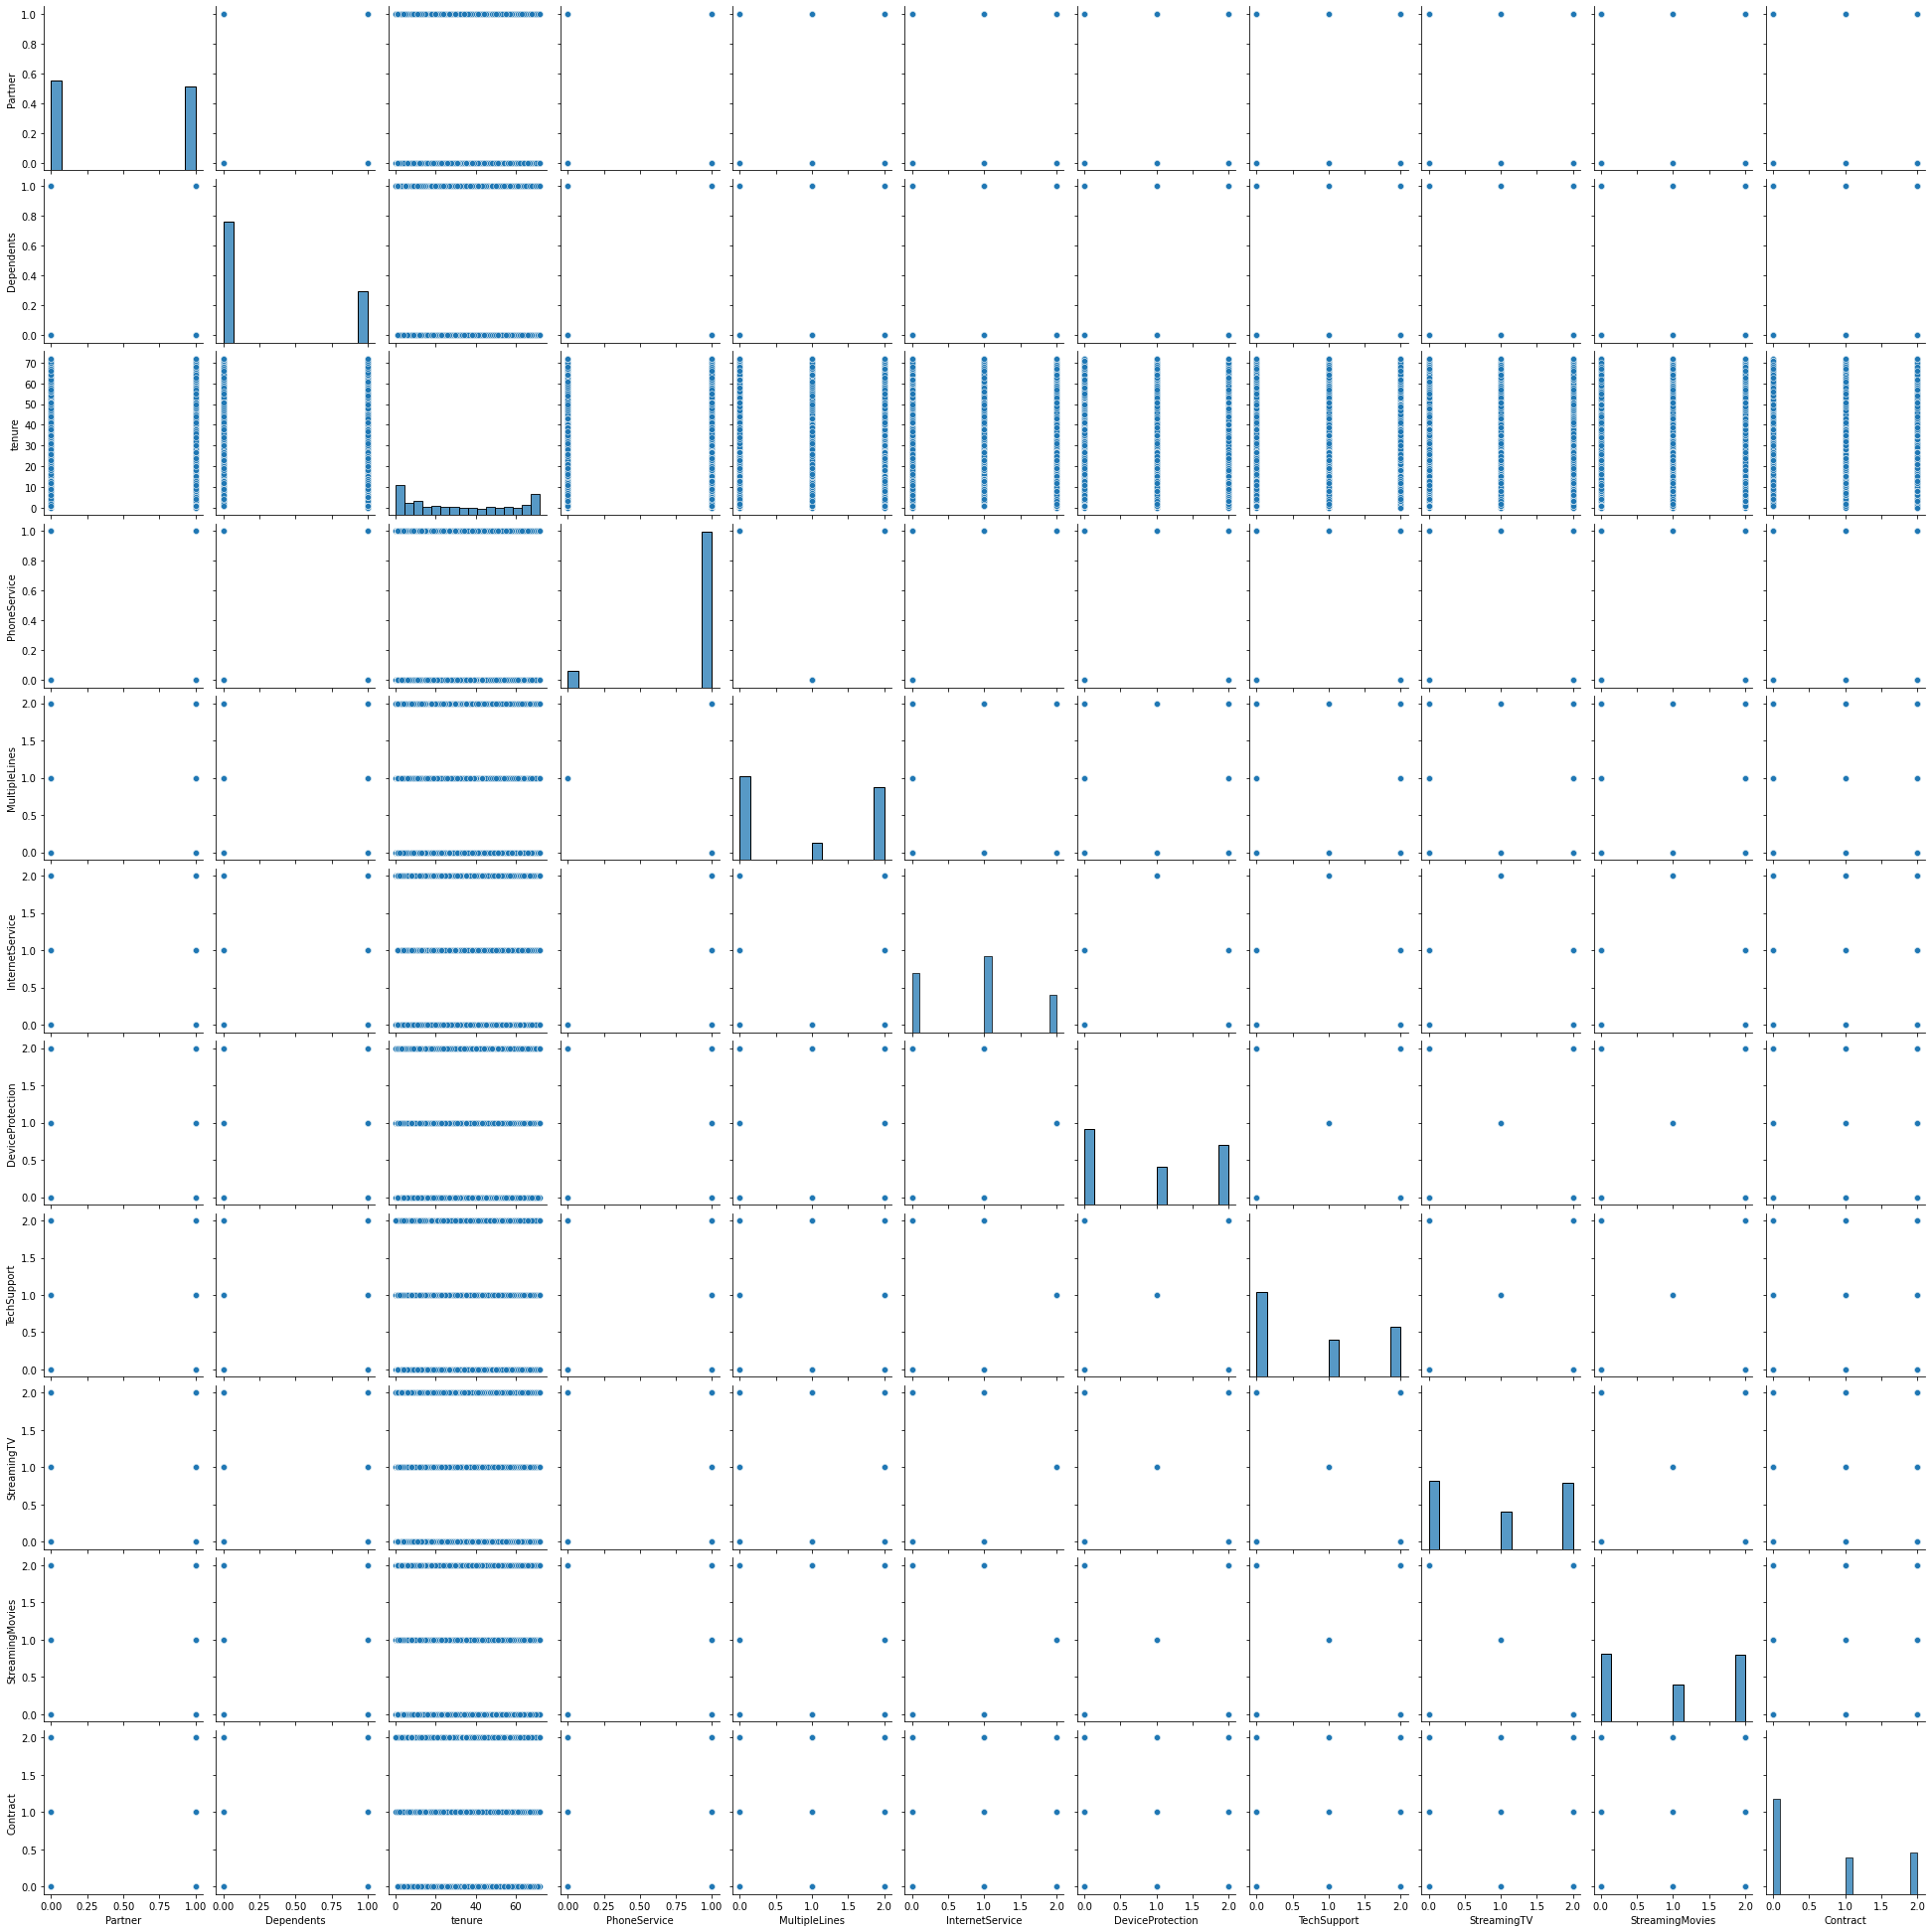

In [25]:
target = df['Churn']
sns.pairplot(df[['Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract']])
plt.show()

In [26]:
#8. Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable

In [27]:
y= df['Churn']
X= df.drop('Churn', axis =1)


In [28]:
#9. Split the dataset into two parts (i.e. 70% train and 30% test)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

length of X_train and x_test:  4930 2113
length of y_train and y_test:  4930 2113
(4930, 13) (2113, 13)
(4930,) (2113,)


In [30]:
#10. Standardize the columns using z-score scaling approach

In [31]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00014201e+00  4.52740565e-01  3.79751380e-01  1.77081775e-02
   1.42430714e-01  8.91473477e-04  1.66353970e-01  1.26751319e-01
   1.37360940e-01  1.29592294e-01  2.94848088e-01  9.68616892e-02
   3.18856837e-01]
 [ 4.52740565e-01  1.00014201e+00  1.59735011e-01 -1.76192871e-03
  -2.49941905e-02  4.45967727e-02  8.05485994e-02  1.33542492e-01
   4.68915436e-02  2.13240441e-02  2.43222006e-01 -1.13906403e-01
   6.45440822e-02]
 [ 3.79751380e-01  1.59735011e-01  1.00014201e+00  8.44940642e-03
   3.43080567e-01 -3.03633454e-02  3.71158135e-01  3.22987442e-01
   2.89414310e-01  2.96908429e-01  6.71701921e-01  2.47935059e-01
   8.24874435e-01]
 [ 1.77081775e-02 -1.76192871e-03  8.44940642e-03  1.00014201e+00
  -2.05407478e-02  3.87491040e-01  3.72784508e-03 -1.91604061e-02
   5.53611145e-02  4.38758483e-02  2.24769354e-03  2.47433095e-01
   1.12866768e-01]
 [ 1.42430714e-01 -2.49941905e-02  3.43080567e-01 -2.05407478e-02
   1.00014201e+00 -1.09231308e-01  1.2233539

In [32]:
#11. Write a function. (8 points)
#i) Which can take the model and data as inputs.
#ii) Fit the model with the train data.
#iii) Make predictions on the test set.
#iv) Returns the Accuracy Score.

In [33]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy =accuracy_score(y_test,prediction)
    return accuracy

In [34]:
#12. Use the function and train a Logistic regression, KNN, and Naive Bayes, Decision tree, Random forest, Boosting and Stacking Classifier models and make predictions on test data.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier


lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [36]:
result = pd.DataFrame(columns = ['Churn'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc],
                            ['Logistic Regression','Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest',
                            'Ada Boost', 'Gradient Boost', 'Stacking']):
    result.loc[model_name]=fit_n_print(model, X_train, X_test, y_train, y_test)

In [37]:
#13. Display and compare all the models designed with their test accuracies.

In [38]:
result

,Churn
Logistic Regression,0.783720
Naive Bayes,0.737340
KNN,0.753431
Decision Tree,0.733081
Random Forest,0.760530
Ada Boost,0.787979
Gradient Boost,0.781354
Stacking,0.759584


In [25]:
#14. Select the final best trained model along with your detailed comments for selecting this model

Gradient Boost is the Best Trained Model because it gives highest accuracy

In [26]:
#15. Write your conclusion on the results